In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_pickle("data.pkl")

In [3]:
df.shape

(429200, 85)

In [4]:
df.head()

,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_FATAL INJURIES_INCAPACITATING,INJURIES_FATAL INJURIES_NON_INCAPACITATING,INJURIES_FATAL INJURIES_REPORTED_NOT_EVIDENT,INJURIES_FATAL INJURIES_NO_INDICATION,INJURIES_INCAPACITATING INJURIES_NON_INCAPACITATING,INJURIES_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT,INJURIES_INCAPACITATING INJURIES_NO_INDICATION,INJURIES_NON_INCAPACITATING INJURIES_REPORTED_NOT_EVIDENT,TRAFFIC_CONTROL_DEVICE_DELINEATORS,TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL,TRAFFIC_CONTROL_DEVICE_LANE USE MARKING,TRAFFIC_CONTROL_DEVICE_NO PASSING,TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING,TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN,TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN,TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_POLICE/FLAGMAN,TRAFFIC_CONTROL_DEVICE_RAILROAD CROSSING GATE,TRAFFIC_CONTROL_DEVICE_RR CROSSING SIGN,TRAFFIC_CONTROL_DEVICE_SCHOOL ZONE,TRAFFIC_CONTROL_DEVICE_YIELD,WEATHER_CONDITION_CLOUDY,WEATHER_CONDITION_FOG,WEATHER_CONDITION_RAIN,WEATHER_CONDITION_SNOW,WEATHER_CONDITION_UNKNOWN/OTHER,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",LIGHTING_CONDITION_DUSK/DAWN,LIGHTING_CONDITION_UNKNOWN,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_REAR TO FRONT,FIRST_CRASH_TYPE_REAR TO REAR,FIRST_CRASH_TYPE_REAR TO SIDE,FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,FIRST_CRASH_TYPE_TRAIN,FIRST_CRASH_TYPE_TURNING,TRAFFICWAY_TYPE_CENTER TURN LANE,TRAFFICWAY_TYPE_DIVIDED - W/MEDIAN BARRIER,TRAFFICWAY_TYPE_DRIVEWAY,TRAFFICWAY_TYPE_INTERSECTION,TRAFFICWAY_TYPE_PARKING LOT,TRAFFICWAY_TYPE_RAMP,TRAFFICWAY_TYPE_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_SNOW,ROADWAY_SURFACE_COND_UNKNOWN/OTHER,ROADWAY_SURFACE_COND_WET,ROAD_DEFECT_NO DEFECTS,"ROAD_DEFECT_RUT, HOLES",ROAD_DEFECT_SHOULDER DEFECT,ROAD_DEFECT_WORN SURFACE,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500",PRIM_CONTRIBUTORY_CAUSE_BICYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_CELL PHONE USE OTHER THAN TEXTING,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING OTHER TRAFFIC SIGNS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING ROAD MARKINGS,PRIM_CONTRIBUTORY_CAUSE_DISREGARDING YIELD SIGN,PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - FROM OUTSIDE VEHICLE,"PRIM_CONTRIBUTORY_CAUSE_DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",PRIM_CONTRIBUTORY_CAUSE_DRIVING ON WRONG SIDE/WRONG WAY,"PRIM_CONTRIBUTORY_CAUSE_EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",PRIM_CONTRIBUTORY_CAUSE_EXCEEDING AUTHORIZED SPEED LIMIT,PRIM_CONTRIBUTORY_CAUSE_EXCEEDING SAFE SPEED FOR CONDITIONS,PRIM_CONTRIBUTORY_CAUSE_HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE),PRIM_CONTRIBUTORY_CAUSE_MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT,PRIM_CONTRIBUTORY_CAUSE_OBSTRUCTED CROSSWALKS,PRIM_CONTRIBUTORY_CAUSE_PASSING STOPPED SCHOOL BUS,PRIM_CONTRIBUTORY_CAUSE_RELATED TO BUS STOP,PRIM_CONTRIBUTORY_CAUSE_ROAD CONSTRUCTION/MAINTENANCE,PRIM_CONTRIBUTORY_CAUSE_ROAD ENGINEERING/SURFACE/MARKING DEFECTS,PRIM_CONTRIBUTORY_CAUSE_TEXTING,PRIM_CONTRIBUTORY_CAUSE_TURNING RIGHT ON RED,season_Summer,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0

## Lasso

In [5]:
target = df['target']
df_features = df.drop(columns = ['target'])

In [6]:
lasso = Lasso(alpha = 0.01, normalize=False)
lasso.fit(df_features, target)

Lasso(alpha=0.01)

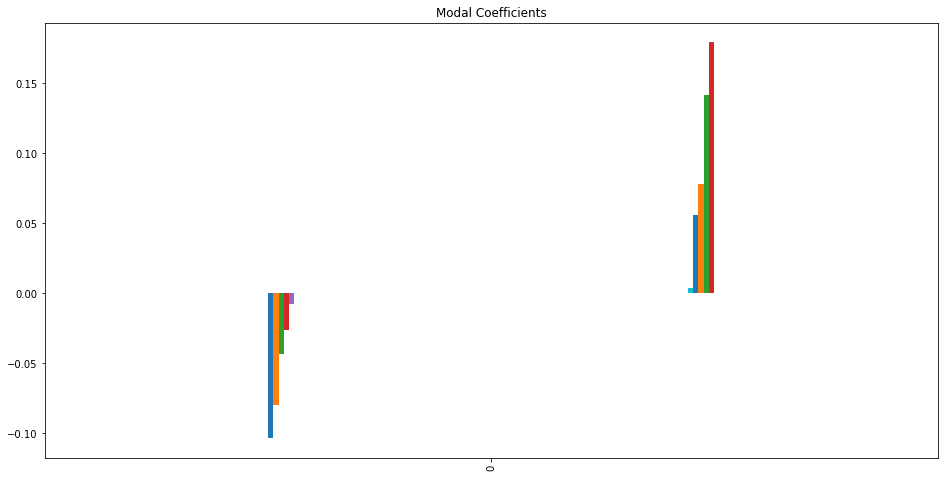

In [7]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = df_features.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [8]:
lasso_coef01.T

,0
FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,-0.103297
FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,-0.079616
FIRST_CRASH_TYPE_REAR END,-0.043420
"DAMAGE_$501 - $1,500",-0.026645
TRAFFICWAY_TYPE_PARKING LOT,-0.007879
"ROAD_DEFECT_RUT, HOLES",-0.000000
ROAD_DEFECT_NO DEFECTS,0.000000
ROADWAY_SURFACE_COND_WET,0.000000
ROADWAY_SURFACE_COND_UNKNOWN/OTHER,-0.000000
ROADWAY_SURFACE_COND_SNOW,-0.000000


In [9]:
df_lr = df_features

In [10]:
lasso_drop = list(lasso_coef01.T[lasso_coef01.T[0] == 0].index)

In [11]:
df_lr.drop(columns = lasso_drop, inplace = True)

In [12]:
df_lr.shape

(429200, 10)

In [13]:
df_lr.head()

,INJURIES_INCAPACITATING,INJURIES_INCAPACITATING INJURIES_NO_INDICATION,"LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD",FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDESTRIAN,FIRST_CRASH_TYPE_REAR END,FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION,TRAFFICWAY_TYPE_PARKING LOT,"DAMAGE_$501 - $1,500","DAMAGE_OVER $1,500"
0,0.0,0.0,0,1,0,0,0,0,0,1
1,0.0,0.0,0,0,0,0,1,0,0,1
2,0.0,0.0,0,0,0,0,1,0,0,1
3,0.0,0.0,0,0,0,0,0,0,0,1
4,0.0,0.0,1,0,0,0,0,0,0,1


## Logistic Regression with Lasso

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_lr, target, random_state=1)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [15]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)


In [16]:
print(metrics.f1_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.37923635457976507
0.7981267474370922
0.37999828262300706


In [17]:
f1_scores = {}
f1_scores['Logistic with Lasso'] = metrics.f1_score(y_test, y_pred)

## Logistic without Lasso

In [18]:
target = df['target']
df_features = df.drop(columns = ['target'])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

/Users/singh/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [21]:
print(metrics.f1_score(y_train, y_pred_train))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.f1_score(y_test, y_pred))

0.47523706384215114
0.8146039142590866
0.4760725855303011


In [22]:
df_features.shape


(429200, 84)

In [23]:
f1_scores['Logistic without Lasso'] = metrics.f1_score(y_test, y_pred)

In [24]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011}

## Logistic with Class weight balanced


In [30]:
lr_clf_weighted = LogisticRegression(solver='liblinear', class_weight = 'balanced')
lr_clf_weighted.fit(X_train, y_train)
y_weighted_train = lr_clf_weighted.predict(X_train)
y_weighted_test = lr_clf_weighted.predict(X_test)

f1_train = metrics.f1_score(y_train, y_weighted_train)
f1_test = metrics.f1_score(y_test, y_weighted_test)
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_weighted_test))
print('Train F1 score: ', f1_train)
print('Test F1 score: ', f1_test)

Test Accuracy score:  0.7370922646784716
Train F1 score:  0.5716007067674502
Test F1 score:  0.5725368972936933


In [31]:
f1_scores['Logistic with class weight balanced'] = f1_test

In [32]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933}

## Decision Tree

In [34]:
clf = DecisionTreeClassifier(class_weight='balanced')

In [35]:
clf = clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
df1 = metrics.f1_score(y_test, y_pred_test)
print("Testing F1 Score:",df1)

Training F1 Score: 0.5994433762840056
Testing F1 Score: 0.5663952768652099


In [36]:
f1_scores['Decision Tree'] = df1

In [37]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099}

## Random Forest

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, test_size=0.25, random_state=23 )

In [41]:
rfc = RandomForestClassifier(random_state = 1, n_estimators = 500, max_depth=2, n_jobs = -1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, n_jobs=-1, random_state=1)

In [42]:
rfc_preds_train = rfc.predict(X_train)
rfc_preds = rfc.predict(X_test)

rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1)


Train F1 score:  0.07936169412000854
Test F1 score:  0.07357204714032908


In [43]:
f1_scores['Random Forest'] = rfc_f1

In [44]:
f1_scores

{'Logistic with Lasso': 0.37999828262300706,
 'Logistic without Lasso': 0.4760725855303011,
 'Logistic with class weight balanced': 0.5725368972936933,
 'Decision Tree': 0.5663952768652099,
 'Random Forest': 0.07357204714032908}

## Grid Search with Random Forest

In [53]:
params = { 
    'n_estimators': [100,500],
    'max_depth': [2,3,4],
    'max_features': [0.6, 0.7],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']}

In [ ]:
rf = RandomForestClassifier()
grid_tree = GridSearchCV(rf, params, cv=5, scoring='f1', n_jobs =-1, verbose = 1)
grid_tree.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 17.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 95.9min


In [49]:
print(grid_tree.best_score_)

print(grid_tree.best_params_)

print(grid_tree.best_estimator_)


0.5350014867776938
{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'n_estimators': 500}
RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.6,
                       n_estimators=500)


In [50]:
y_pred_train = grid_tree.best_estimator_.predict(X_train)
y_pred_test = grid_tree.best_estimator_.predict(X_test)


# checking accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print("Training F1:",metrics.f1_score(y_train, y_pred_train))
print("Test F1:",metrics.f1_score(y_test, y_pred_test))


Accuracy: 0.664874184529357
Training F1: 0.5348113624561719
Test F1: 0.5372727155743717


In [52]:
rfc = RandomForestClassifier(class_weight = 'balanced',random_state = 1, n_estimators = 500, max_depth=2, n_jobs = -1, verbose = 1)
rfc.fit(X_train, y_train)
rfc_preds_train = rfc.predict(X_train)
rfc_preds = rfc.predict(X_test)

rfc_f1_train = metrics.f1_score(y_train, rfc_preds_train)
rfc_f1 = metrics.f1_score(y_test, rfc_preds)
print('Train F1 score: ', rfc_f1_train)
print('Test F1 score: ', rfc_f1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   11.7s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.8s finis

Train F1 score:  0.5377603092223839
Test F1 score:  0.5403509686839978
